In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12


# Loading and Exploring Data

In [121]:
#Loading and reading dataset
fpath = 'C:\\Users\\Owner\\OneDrive - Sify Technologies Limited\\Desktop\\Dataset\\diabetic_data.csv'
diabetes = pd.read_csv(fpath)

In [3]:
#First few rows of dataset

diabetes.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1          None   
1                 0     276  250.01    255                 9          None   
2                 1     648     250    V27                 6          None   
3                 0       8  250.43    403                 7          None   
4                 0     197     157    250                 5          None   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0      None        No          No          No             No          No   
1      None        No          No          No             No          No   
2      None        No          No          No             No          No   
3      None        No          No          No             No          No   
4      None        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

In [4]:
#Number of rows and columns

diabetes.shape

(101766, 50)

In [5]:
#Getting general information

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Cleaning

In [6]:
#Replacing '?' with 'NAN'

diabetes = diabetes.replace(
    '?', np.nan
)

In [7]:
#Renaming columns

diabetes = diabetes.rename(
    columns = {'admission_type_id': 'admission type',
               'discharge_disposition_id': 'discharge type', 
               'admission_source_id':'admission source', 
               'time_in_hospital':'days_in_hospital',
               'number_outpatient':'outpatient', 
               'number_emergency': 'emergency visit',
               'number_inpatient': 'inpatient'}
)

In [8]:
#Checking for null values+
missing_val = diabetes.isnull()\
                      .sum()\
                      .sort_values(ascending=False)
missing_val

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
inpatient                       0
emergency visit                 0
outpatient                      0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
days_in_hospital                0
admission source                0
discharge type                  0
admission type                  0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [9]:
#Perccentage of missing values

missing_pct = missing_val[missing_val != 0]/len(diabetes) * 100
missing_pct

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

In [123]:
#Removing columns with more missing values and unwanted columns

diabetes_cleaned = diabetes.drop(
    columns = ['weight', 'medical_specialty', 'payer_code'], 
    axis = 1)


In [144]:
#Columns with low missing value is replaced with mode and mean

diabetes_cleaned['race'] = diabetes_cleaned['race']\
                           .fillna(diabetes_cleaned['race'].mode().loc[0])

diabetes_cleaned['diag_1'] = diabetes_cleaned['diag_1']\
                              .fillna(diabetes_cleaned.loc[:,'diag_1'].mode())
diabetes_cleaned['diag_2'] = diabetes_cleaned['diag_2']\
                              .fillna(diabetes_cleaned['diag_2'].mode().loc[0])
diabetes_cleaned['diag_3'] = diabetes_cleaned['diag_3']\
                            .fillna(diabetes_cleaned['diag_3'].mode().loc[0])

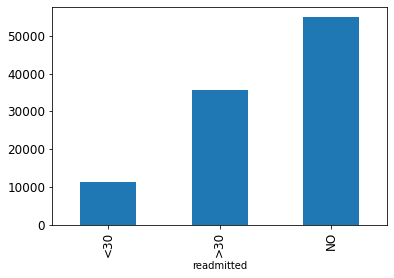

In [12]:
#Visualizing for unique values in readmitted

diabetes_cleaned.groupby(['readmitted'])\
                .size()
                .plot(kind='bar')
plt.show()

In [13]:
# Changing the value of readmitted to 0 and 1 for future analysis

diabetes_cleaned['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in diabetes_cleaned['readmitted']])



In [14]:
#Changing values to binary type

diabetes_cleaned['admission type'] = pd.Series(['Emergency' if val == 1 \
                                               else ('Urgent' if val == 2 else '0') for val in diabetes_cleaned['admission type']])

diabetes_cleaned['admission source'] = pd.Series(['Referral' if val == 1 \
                                               else '0' for val in diabetes_cleaned['admission source']])

diabetes_cleaned['discharge type'] = pd.Series(['Discharged' if val == 1 \
                                               else '0' for val in diabetes_cleaned['discharge type']])

In [15]:
#Converting to two categories as male and female

diabetes_cleaned['gender'] = ['Male' if val == 'Male' else 'Female' for val in diabetes_cleaned['gender']]

In [16]:
diabetes_cleaned.head()

encounter_id  patient_nbr             race  gender      age admission type  \
0       2278392      8222157        Caucasian  Female   [0-10)              0   
1        149190     55629189        Caucasian  Female  [10-20)      Emergency   
2         64410     86047875  AfricanAmerican  Female  [20-30)      Emergency   
3        500364     82442376        Caucasian    Male  [30-40)      Emergency   
4         16680     42519267        Caucasian    Male  [40-50)      Emergency   

  discharge type admission source  days_in_hospital  num_lab_procedures  \
0              0         Referral                 1                  41   
1     Discharged                0                 3                  59   
2     Discharged                0                 2                  11   
3     Discharged                0                 2                  44   
4     Discharged                0                 1                  51   

   num_procedures  num_medications  outpatient  emergency visit  inpatient  \
0               0                1           0                0          0   
1               0               18           0                0          0   
2               5               13           2                0          1   
3               1               16           0                0          0   
4               0                8           0                0          0   

   diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0  250.83     276    250                 1          None      None        No   
1     276  250.01    255                 9          None      None        No   
2     648     250    V27                 6          None      None        No   
3       8  250.43    403                 7          None      None        No   
4     197     157    250                 5          None      None        No   

  repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
0          No          No             No          No            No        No   
1          No          No             No          No            No        No   
2          No          No             No          No            No    Steady   
3          No          No             No          No            No        No   
4          No          No             No          No            No    Steady   

  glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol  \
0        No          No           No            No       No       No   
1        No          No           No            No       No       No   
2        No          No           No            No       No       No   
3        No          No           No            No       No       No   
4        No          No           No            No       No       No   

  troglitazone tolazamide examide citoglipton insulin glyburide-metformin  \
0           No         No      No          No      No                  No   
1           No         No      No          No      Up                  No   
2           No         No      No          No      No                  No   
3           No         No      No          No      Up                  No   
4           No         No      No          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                       No                      No   

  metformin-pioglitazone change diabetesMed  readmitted  
0                     No     No          No           0  
1                     No     Ch         Yes           1  
2                     No     No         Yes           0  
3                     No     Ch         Yes           0  
4  

In [17]:
#Finding the data summary

diabetes_cleaned.describe().T

count          mean           std      min         25%  \
encounter_id        101766.0  1.652016e+08  1.026403e+08  12522.0  84961194.0   
patient_nbr         101766.0  5.433040e+07  3.869636e+07    135.0  23413221.0   
days_in_hospital    101766.0  4.395987e+00  2.985108e+00      1.0         2.0   
num_lab_procedures  101766.0  4.309564e+01  1.967436e+01      1.0        31.0   
num_procedures      101766.0  1.339730e+00  1.705807e+00      0.0         0.0   
num_medications     101766.0  1.602184e+01  8.127566e+00      1.0        10.0   
outpatient          101766.0  3.693572e-01  1.267265e+00      0.0         0.0   
emergency visit     101766.0  1.978362e-01  9.304723e-01      0.0         0.0   
inpatient           101766.0  6.355659e-01  1.262863e+00      0.0         0.0   
number_diagnoses    101766.0  7.422607e+00  1.933600e+00      1.0         6.0   
readmitted          101766.0  4.608808e-01  4.984698e-01      0.0         0.0   

                            50%           75%          max  
encounter_id        152388987.0  2.302709e+08  443867222.0  
patient_nbr          45505143.0  8.754595e+07  189502619.0  
days_in_hospital            4.0  6.000000e+00         14.0  
num_lab_procedures         44.0  5.700000e+01        132.0  
num_procedures              1.0  2.000000e+00          6.0  
num_medications            15.0  2.000000e+01         81.0  
outpatient                  0.0  0.000000e+00         42.0  
emergency visit             0.0  0.000000e+00         76.0  
inpatient                   0.0  1.000000e+00         21.0  
number_diagnoses            8.0  9.000000e+00         16.0  
readmitted                  0.0  1.000000e+00          1.0

# Data Visualization

In [18]:
#Number of patients readmitted

readmitted_count = diabetes_cleaned['readmitted'].value_counts().reset_index(name ='value count')\
                                                 .rename(columns ={'index':'readmisstion'})
readmitted_count
#

readmisstion  value count
0             0        54864
1             1        46902

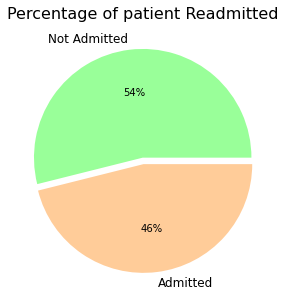

In [73]:
#Visualization of percentage of patients readmitted

plt.figure(figsize=(7,5))
labels = ['Not Admitted', 'Admitted']
explode = [0.03, 0.03]
colors = ['#99ff99','#ffcc99']
plt.pie(readmitted_count['value count'],
        labels = labels, 
        colors = colors, 
        autopct = '%0.0f%%', 
        explode = explode)
plt.title('Percentage of patient Readmitted', fontsize=16)
plt.savefig('Percentage of patient Readmitted.jpeg')
plt.show()

   The above chart shows that the percentage of patient readmission is lower than the patient not admitted. This indicates that this dataset is imbalanced dastaset. 

In [145]:
#Distribution of age
age = px.histogram(diabetes_cleaned, 
                   x = 'age', 
                   title = 'Distribution of Age', 
                   text_auto ='.2s')
age.show()


The above graph shows that people between the age group 50 and 90 are mostly readmitted.

In [89]:
#Calculating the total number of patients in each category

race = diabetes_cleaned['race']\
       .value_counts().reset_index(name = 'Count')\
       .rename(columns = {'index':'race'})
race

race  Count
0        Caucasian  78372
1  AfricanAmerican  19210
2         Hispanic   2037
3            Other   1506
4            Asian    641

In [92]:
#Visualizing which category of people mostly readmitted 

race_ = px.bar(race, 
               x ='race', 
               y = 'Count',
               color = 'race',
               title = 'Type of people affected', 
               text_auto = '.2s')
race_.show()


<Figure size 432x288 with 0 Axes>

In [158]:
#Calculating gender count

gender = diabetes_cleaned['gender']\
         .value_counts(normalize = True)\
         .reset_index(name ='fraction')\
         .rename(columns ={'index':'gender'})
gender

gender  fraction
0           Female  0.537586
1             Male  0.462384
2  Unknown/Invalid  0.000029

In [160]:
#Visualizing gender count
colors =['r','b']
gender_ = px.bar(gender, 
                 x = 'gender', 
                 y = 'fraction',
                 title = 'Percentage of gender affected', 
                 height = 500, width = 600, 
                 text_auto = '.2s'
                )
gender_.show()

In [25]:
#Calculating patients readmission based on age above 50 and gender

age_count = diabetes_cleaned.groupby(['age', 'gender'])['readmitted']\
                            .value_counts(normalize = True)\
                            .reset_index(name ='count')
age_count_new = age_count['age']\
                .isin(['[50-60)','[60-70)','[70-80)', '[80-90)'])
age_gender = age_count[age_count_new]
age_gender

age  gender  readmitted     count
20  [50-60)  Female           0  0.538497
21  [50-60)  Female           1  0.461503
22  [50-60)    Male           0  0.582105
23  [50-60)    Male           1  0.417895
24  [60-70)  Female           0  0.528295
25  [60-70)  Female           1  0.471705
26  [60-70)    Male           0  0.546362
27  [60-70)    Male           1  0.453638
28  [70-80)  Female           0  0.517909
29  [70-80)  Female           1  0.482091
30  [70-80)    Male           0  0.519825
31  [70-80)    Male           1  0.480175
32  [80-90)  Female           0  0.511460
33  [80-90)  Female           1  0.488540
34  [80-90)    Male           0  0.526489
35  [80-90)    Male           1  0.473511

In [118]:
#Visualizing patient readmission with age above 50

age_count = px.bar(
    age_gender, 
    x = 'age',
    y = 'count',
    color = 'readmitted', 
    barmode ='group', 
    facet_row = 'gender', 
    text_auto =True,
    color_discrete_sequence=["orange", "blue"]
)

age_count.show()


<Figure size 432x288 with 0 Axes>

In [167]:
cols = ['diag_1', 'diag_2', 'diag_3']

In [168]:
#Creating the column combined code
diabetes_cleaned['combined_code'] = diabetes_cleaned[cols]\
                                    .apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [169]:
#Calculating the number of diagnosis done foe each patient

diabetes_cleaned['combined_code_list'] = [row.split(" ") for row in diabetes_cleaned['combined_code']]

In [170]:
diabetes_cleaned['combined_code_count'] = [len(set(row.split(" "))) for row in diabetes_cleaned['combined_code']]

In [171]:
diabetes_cleaned['combined_code_list']

0             [250.83, ?, ?]
1         [276, 250.01, 255]
2            [648, 250, V27]
3           [8, 250.43, 403]
4            [197, 157, 250]
                 ...        
101761    [250.13, 291, 458]
101762       [560, 276, 787]
101763        [38, 590, 296]
101764       [996, 285, 998]
101765       [530, 530, 787]
Name: combined_code_list, Length: 101766, dtype: object

In [172]:
#Total number of diagnosis for each patient
diabetes_cleaned['combined_code_count']

0         2
1         3
2         3
3         3
4         3
         ..
101761    3
101762    3
101763    3
101764    3
101765    2
Name: combined_code_count, Length: 101766, dtype: int64

In [173]:
#Value count readmitted for each person with number of diagnosis
diag_combined = diabetes_cleaned.groupby('combined_code_count')['readmitted']\
                                .value_counts(normalize=True)\
                                .reset_index(name ='fraction')
diag_combined

combined_code_count readmitted  fraction
0                    1         NO  0.560000
1                    1        >30  0.370000
2                    1        <30  0.070000
3                    2         NO  0.565685
4                    2        >30  0.332922
5                    2        <30  0.101393
6                    3         NO  0.537528
7                    3        >30  0.350227
8                    3        <30  0.112245

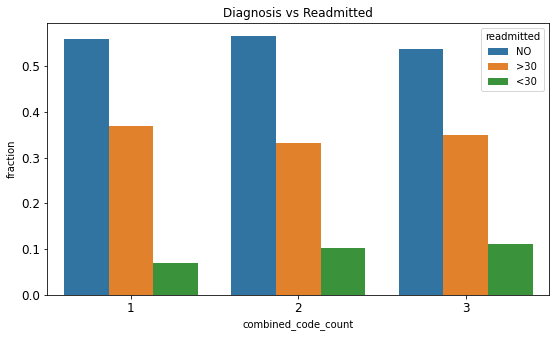

In [174]:
#Visualizing the patient readmitted vs number of diagnosis

plt.figure(figsize=(9,5))
sns.barplot(x = 'combined_code_count', y ='fraction', data = diag_combined, hue = 'readmitted')
plt.title('Diagnosis vs Readmitted')
plt.savefig('Diagnosis vs Readmitted')
plt.show()

In [35]:
#Creating temporary dataframe for further analysis

temp_df = diabetes_cleaned[['diag_1', 'age', 'gender', 'readmitted', 'change', 'days_in_hospital']]
temp_df

diag_1      age  gender  readmitted change  days_in_hospital
0       250.83   [0-10)  Female           0     No                 1
1          276  [10-20)  Female           1     Ch                 3
2          648  [20-30)  Female           0     No                 2
3            8  [30-40)    Male           0     Ch                 2
4          197  [40-50)    Male           0     Ch                 1
...        ...      ...     ...         ...    ...               ...
101761  250.13  [70-80)    Male           1     Ch                 3
101762     560  [80-90)  Female           0     No                 5
101763      38  [70-80)    Male           0     Ch                 1
101764     996  [80-90)  Female           0     Ch                10
101765     530  [70-80)    Male           0     No                 6

[101766 rows x 6 columns]

In [37]:
#Finding the top most diagnosis carried out

age_diag = temp_df['age']\
           .isin(['[50-60)','[60-70)', '[70-80)','[80-90)'])
age_diag_1 = temp_df[age_diag]
age_diag_1.head(5)

diag_1      age  gender  readmitted change  days_in_hospital
5     414  [50-60)    Male           1     No                 3
6     414  [60-70)    Male           0     Ch                 4
7     428  [70-80)    Male           1     No                 5
8     398  [80-90)  Female           0     Ch                13
11    157  [60-70)    Male           1     Ch                 7

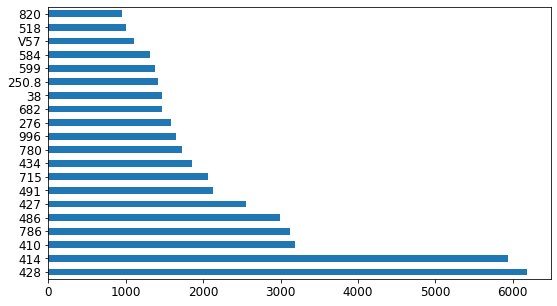

In [153]:
diag_ranking = age_diag_1['diag_1']\
               .value_counts()\
               .nlargest(20)
diag_ranking.plot(kind = 'barh', figsize=(9,5))
plt.savefig('Top 50 diag_1.jpeg')
plt.show()

In [156]:
#Creating a temporary column with top 3 diagnosis procedure

diag_readmit = age_diag_1["diag_1"]\
               .isin(['410','414','428'])
diag_readmit_ = age_diag_1[diag_readmit]
diag_readmit_

diag_1      age  gender  readmitted change  days_in_hospital
5         414  [50-60)    Male           1     No                 3
6         414  [60-70)    Male           0     Ch                 4
7         428  [70-80)    Male           1     No                 5
13        428  [80-90)    Male           0     No                10
16        410  [50-60)    Male           1     Ch                 4
...       ...      ...     ...         ...    ...               ...
101715    414  [50-60)    Male           0     Ch                13
101718    428  [70-80)  Female           0     No                 2
101725    428  [70-80)  Female           0     Ch                12
101739    414  [70-80)    Male           0     No                 1
101747    410  [70-80)  Female           1     No                 8

[15311 rows x 6 columns]

In [157]:
#Visualizing the value count for each diagnosis type

age_count = px.histogram(diag_readmit_, 
                         x = 'age', 
                         color = 'gender', 
                         barmode ='group',
                         text_auto='.2s', 
                         facet_row = 'diag_1', 
                         facet_col='readmitted')
age_count.show()
plt.savefig('Top 3 Diagnosis.jpeg')

<Figure size 432x288 with 0 Axes>

<Figure size 648x504 with 0 Axes>

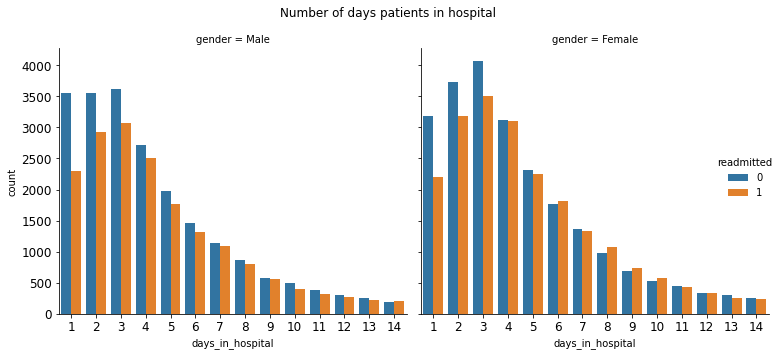

In [68]:
#Number of days Patients admitted in Hospital

plt.figure(figsize=(9,7))
sns.catplot(data =age_diag_1, 
            x = 'days_in_hospital', 
            hue = 'readmitted', 
            kind = 'count', 
            col = 'gender')
plt.suptitle('Number of days patients in hospital')
plt.tight_layout()
plt.show()


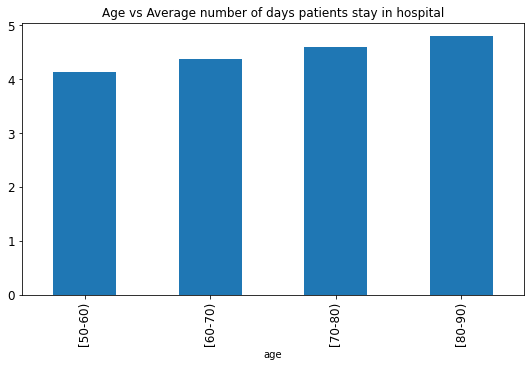

In [94]:
#Average number of days patients admitted in hospital

plt.figure(figsize=(9,5))
age_diag_1.groupby('age')['days_in_hospital']\
          .mean()\
          .plot(kind = 'bar')
plt.title('Age vs Average number of days patients stay in hospital')
plt.savefig('Average Number of days Patient stay in Hospital.jpg')
plt.show()


In [71]:
#Calculating outpatient readmitted
OP_group = diabetes_cleaned[diabetes_cleaned['outpatient']>=2]

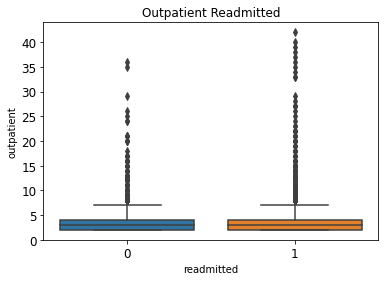

In [95]:
#Visualization of outpatient readmitted
sns.boxplot(x='readmitted', y="outpatient", data=OP_group)
plt.title('Outpatient Readmitted')
plt.savefig('Outpatient Readmitted.jpeg')
plt.show()

In [41]:
#Creating temprory column with change in medication

change_readmit_ = age_diag_1.groupby('change')['readmitted']\
                            .value_counts(normalize =True)\
                            .reset_index(name = 'Fraction')
change_readmit_

change  readmitted  Fraction
0     Ch           0  0.509938
1     Ch           1  0.490062
2     No           0  0.551267
3     No           1  0.448733

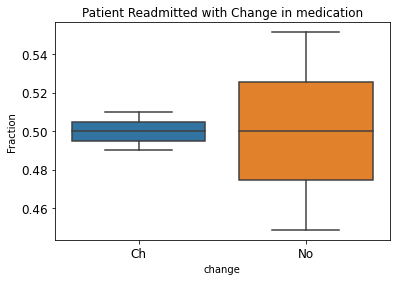

In [96]:
#Visualizing patient readmission with change in medication

sns.boxplot(
    x = 'change', 
    y = 'Fraction',
    data = change_readmit_
)
plt.title('Patient Readmitted with Change in medication')
plt.savefig('Readmission vs Change in Medication')
plt.show()

In [185]:
diabetes_cleaned['med_insulin'] = np.where(diabetes_cleaned.insulin =='No', 0,
                                           np.where(diabetes_cleaned.insulin =='Up', 1,
                                                    np.where(diabetes_cleaned.insulin =='Steady', 2,3)))


In [186]:
diabetes_cleaned['med_insulin'] = np.where(diabetes_cleaned.insulin =='No', 0,
                                           np.where(diabetes_cleaned.insulin =='Up', 1,
                                                    np.where(diabetes_cleaned.insulin =='Steady', 2,3)))


In [188]:
insulin_dose_count = diabetes_cleaned.groupby('med_insulin')['readmitted']\
                                    .value_counts(normalize = True)\
                                    .reset_index(name = 'fraction')\
                                    .rename(columns={'index':'med_insulin'})
insulin_dose_count

med_insulin readmitted  fraction
0             0         NO  0.563029
1             0        >30  0.336598
2             0        <30  0.100374
3             1         NO  0.484624
4             1        >30  0.385472
5             1        <30  0.129905
6             2         NO  0.548932
7             2        >30  0.339784
8             2        <30  0.111284
9             3         NO  0.472090
10            3        >30  0.388934
11            3        <30  0.138975

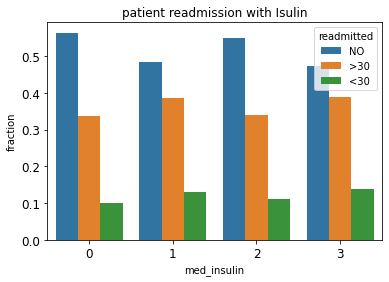

In [189]:
sns.barplot(x = 'med_insulin', 
            y = 'fraction', 
            data = insulin_dose_count, 
            hue = 'readmitted')
plt.title('patient readmission with Isulin')
plt.savefig('readmission vs Insulin')
plt.show()

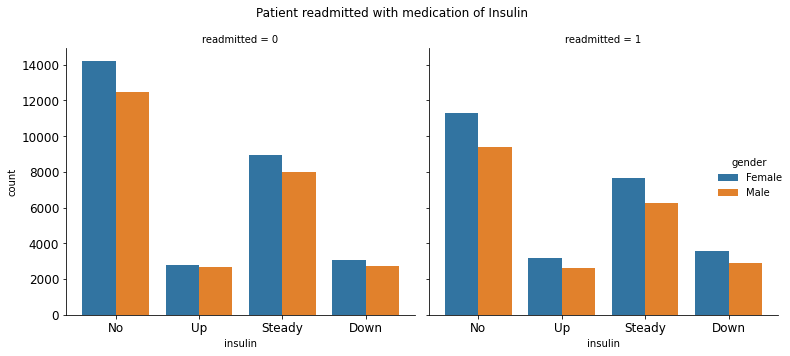

In [101]:
#Patient readmitted with medication of Insulin

sns.catplot(x = 'insulin', 
            data = diabetes_cleaned, 
            hue = 'gender', kind = 'count', 
            col = 'readmitted')
plt.suptitle('Patient readmitted with medication of Insulin')
plt.tight_layout()
plt.plot()
plt.savefig('Readmission with Insulin')
plt.show()

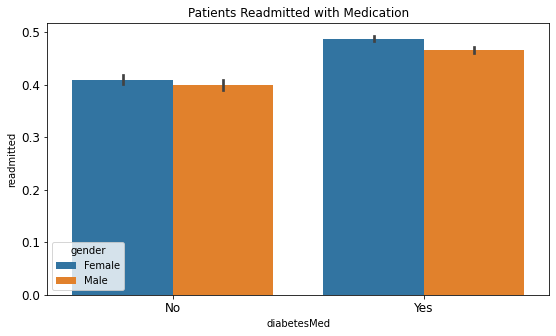

<Figure size 432x288 with 0 Axes>

In [52]:
#Patient readmission with medication

plt.figure(figsize=(9,5))
sns.barplot( data = diabetes_cleaned, 
            x = 'diabetesMed', 
            y = 'readmitted', 
            hue = 'gender')
plt.title('Patients Readmitted with Medication')
plt.show()
plt.savefig('Readmission with Medication.jpeg')

In [120]:
diabetes_less_than_50 = diabetes_cleaned[diabetes_cleaned['age']<'[40-50)']
diabetes_less_than_50

encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
28            250872     41606064        Caucasian    Male  [20-30)   
...              ...          ...              ...     ...      ...   
101703     443191964    125535857        Caucasian    Male  [10-20)   
101710     443207210     30370995            Other  Female  [30-40)   
101719     443256548    162949523        Caucasian    Male  [10-20)   
101726     443700206     60201405         Hispanic    Male  [30-40)   
101728     443710592     84391839        Caucasian  Female  [30-40)   

       admission type discharge type admission source  days_in_hospital  \
0                   0              0         Referral                 1   
1           Emergency     Discharged                0                 3   
2           Emergency     Discharged                0                 2   
3           Emergency     Discharged                0                 2   
28             Urgent     Discharged                0                10   
...               ...            ...              ...               ...   
101703      Emergency     Discharged                0                 3   
101710         Urgent     Discharged                0                 3   
101719      Emergency              0                0                 1   
101726              0              0         Referral                 5   
101728      Emergency     Discharged                0                 5   

        num_lab_procedures  num_procedures  num_medications  outpatient  \
0                       41               0                1           0   
1                       59               0               18           0   
2                       11               5               13           2   
3                       44               1               16           0   
28                      53               0               20           0   
...                    ...             ...              ...         ...   
101703                  44               0               10           0   
101710                  30               1               10           0   
101719                  59               6                9           0   
101726                   1               1               23           0   
101728                  47               0               31           0   

        emergency visit  inpatient  diag_1  diag_2 diag_3  number_diagnoses  \
0                     0          0  250.83     276    250                 1   
1                     0          0     276  250.01    255                 9   
2                     0          1     648     250    V27                 6   
3                     0          0       8  250.43    403                 7   
28                    0          0     277  250.02    263                 6   
...                 ...        ...     ...     ...    ...               ...   
101703                0          0  250.13     287   E849                 7   
101710                0          0     780     780    250                 9   
101719                0          1  250.13     276    250                 1   
101726                0          0     348     344    907                 7   
101728                0          2  250.82     730    707                 9   

       max_glu_serum A1Cresult metformin repaglinide nateglinide  \
0               None      None        No          No          No   
1               None      None        No          No          No   
2               None      None        No          No          No   
3               None      None        No          No          No   
28              None      None        No          No          No

In [132]:
diabetes_greater_than_50 = diabetes_cleaned[diabetes_cleaned['age']>'[40-50)']
diabetes_greater_than_50

encounter_id  patient_nbr             race  gender       age  \
5              35754     82637451        Caucasian    Male   [50-60)   
6              55842     84259809        Caucasian    Male   [60-70)   
7              63768    114882984        Caucasian    Male   [70-80)   
8              12522     48330783        Caucasian  Female   [80-90)   
9              15738     63555939        Caucasian  Female  [90-100)   
...              ...          ...              ...     ...       ...   
101761     443847548    100162476  AfricanAmerican    Male   [70-80)   
101762     443847782     74694222  AfricanAmerican  Female   [80-90)   
101763     443854148     41088789        Caucasian    Male   [70-80)   
101764     443857166     31693671        Caucasian  Female   [80-90)   
101765     443867222    175429310        Caucasian    Male   [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
5                       2                         1                    2   
6                       3                         1                    2   
7                       1                         1                    7   
8                       2                         1                    4   
9                       3                         3                    4   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
5                      3                  31               6               16   
6                      4                  70               1               21   
7                      5                  73               0               12   
8                     13                  68               2               28   
9                     12                  33               3               18   
...                  ...                 ...             ...              ...   
101761                 3                  51               0               16   
101762                 5                  33               3               18   
101763                 1                  53               0                9   
101764                10                  45               2               21   
101765                 6                  13               3                3   

        number_outpatient  number_emergency  number_inpatient  diag_1 diag_2  \
5                       0                 0                 0     414    411   
6                       0                 0                 0     414    411   
7                       0                 0                 0     428    492   
8                       0                 0                 0     398    427   
9                       0                 0                 0     434    198   
...                   ...               ...               ...     ...    ...   
101761                  0                 0                 0  250.13    291   
101762                  0                 0                 1     560    276   
101763                  1                 0                 0      38    590   
101764                  0                 0                 1     996    285   
101765                  0                 0                 0     530    530   

       diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide  \
5         250                 9          None      None        No          No   
6         V45                 7          None      None    Steady          No   
7         250                 8          None      No

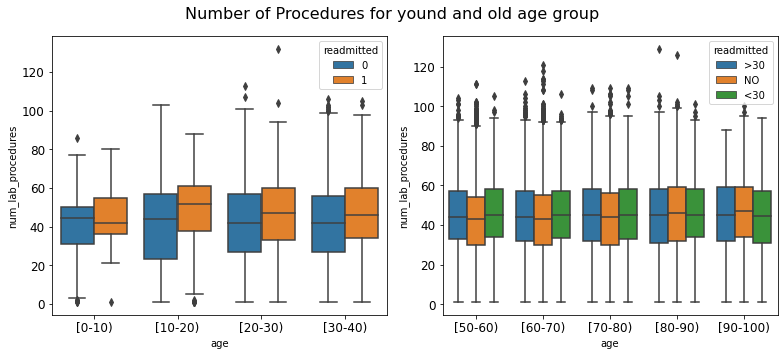

In [152]:

plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1)    
sns.boxplot(x ='age', 
            y = 'num_lab_procedures', 
            data = diabetes_less_than_50, 
            hue = 'readmitted')

plt.subplot(1, 2, 2)   
sns.boxplot(x ='age', 
            y = 'num_lab_procedures', 
            data = diabetes_greater_than_50, 
            hue = 'readmitted')



plt.suptitle('Number of Procedures for yound and old age group', fontsize = 16)
plt.tight_layout()  
plt.show()

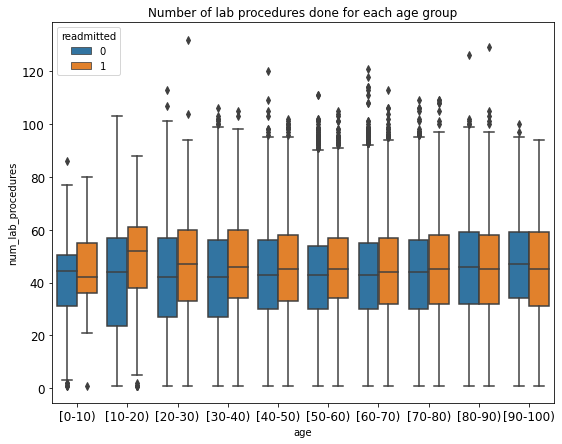

In [102]:
#Number of lab procedures done based on age group

plt.figure(figsize=(9,7))
sns.boxplot(x = 'age', 
            y = 'num_lab_procedures', 
            data = diabetes_cleaned, 
            hue = 'readmitted')
plt.title('Number of lab procedures done for each age group')
plt.savefig('Number of Lab Procedures')
plt.show()


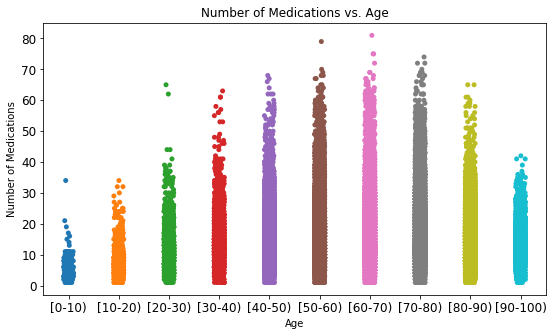

In [103]:
#Visualizing the number of medications given for each age group

plt.figure(figsize=(9,5))

num_medication = diabetes_cleaned.sort_values(by = 'age')
x = sns.stripplot(x = "age", 
                  y = "num_medications", 
                  data = num_medication)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.savefig('Number of Medications')
plt.show()


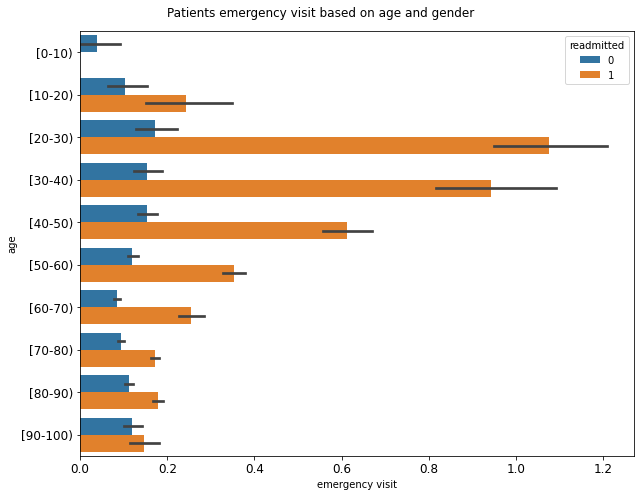

In [62]:
#Patients emergency visit based on gender and age
plt.figure(figsize =(9,7))
sns.barplot(y = 'age', 
            x = 'emergency visit', 
            data = diabetes_cleaned, 
            hue = 'readmitted')
plt.suptitle('Patients emergency visit based on age and gender')
plt.tight_layout()

plt.savefig('Patient Emergency Visit')
plt.show()

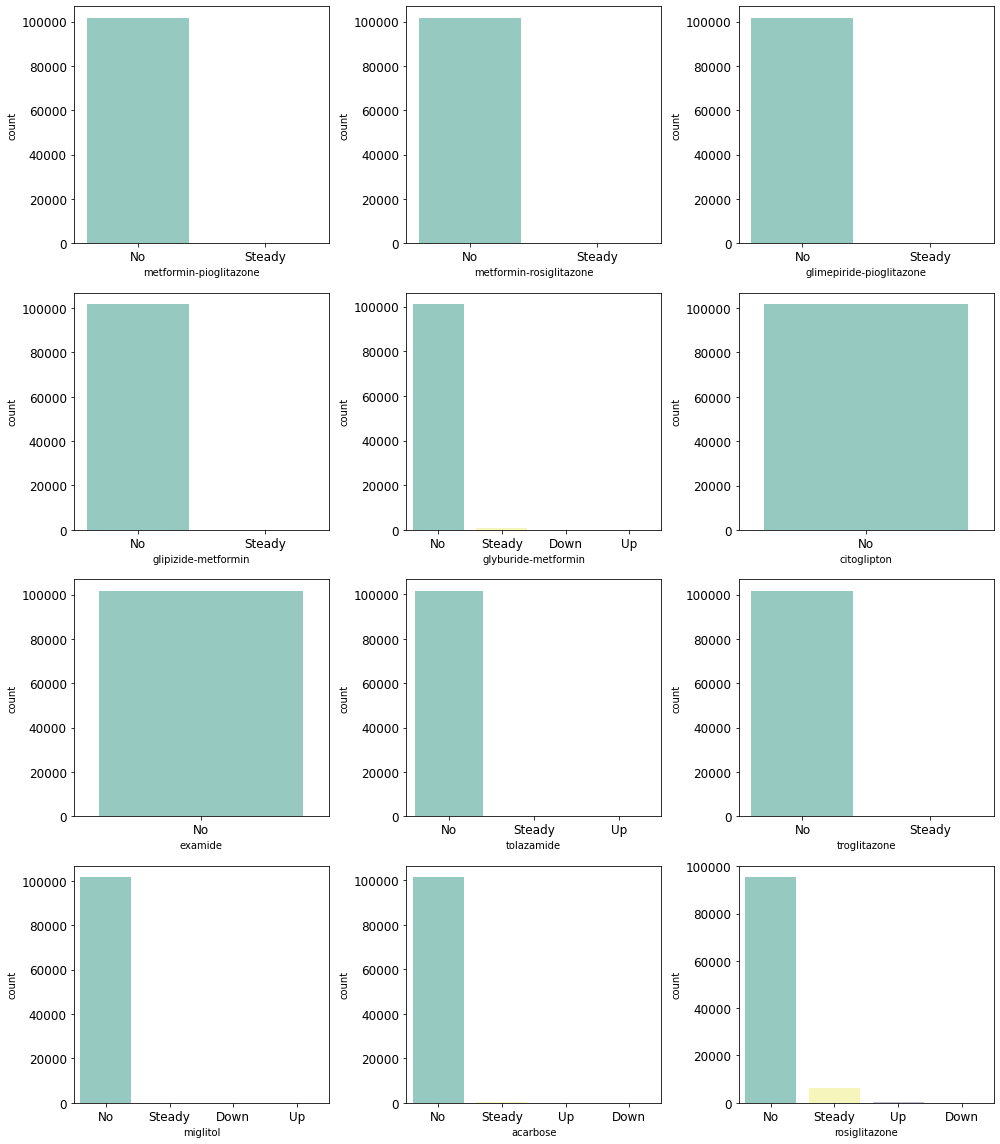

In [60]:
#Visualizing the types of medication given

cols = ['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone',\
          'glipizide-metformin', 'glyburide-metformin', 'citoglipton',\
             'examide', 'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'rosiglitazone']

fig, ax = plt.subplots(4, 3, figsize = (14, 16))

for indx, (col,axes) in list(enumerate(zip(cols, ax.flatten()))):
        sns.countplot(ax = axes, x = diabetes_cleaned[col], palette = 'Set3')
    
plt.tight_layout()    
plt.show()